<!-- ENG -->
# Final assignment

<!-- ENG -->
In previous classes, we have mainly dealt with classification problems. But in the final assignment, we will try regression problems to understand that learned methods can be applied to regression problems as well as classification problems.

When real numbers are required as the answer, **errors are allowed up to 0.01**. Reduce the number of digits as appropriate.

------------

<!-- ENG -->
## DS1 / AI1 Data set construction & data cleansing

<!-- ENG -->
For this assignment, we use the dataset `FA_dataset.csv`, which is based on the "Auto MPG Data Set". This dataset contains the performance information of several cars manufactured between 1970 and 1982, as well as the fuel consumption of those cars.

<!-- ENG -->
First, we read this data set using pandas.

In [37]:
import pandas as pd

In [38]:
df = pd.read_csv("FA_dataset.csv")

In [39]:
print(df.head(100))

     MPG  Cylinders  Displacement  ...  Model Year  Origin  Weight Category
0   18.0          8         307.0  ...          70       1                3
1   15.0          8         350.0  ...          70       1                3
2   18.0          8         318.0  ...          70       1                3
3   16.0          8         304.0  ...          70       1                3
4   17.0          8         302.0  ...          70       1                3
..   ...        ...           ...  ...         ...     ...              ...
95  12.0          8         455.0  ...          73       1                4
96  13.0          8         360.0  ...          73       1                3
97  18.0          6         225.0  ...          73       1                3
98  16.0          6         250.0  ...          73       1                3
99  18.0          6         232.0  ...          73       1                2

[100 rows x 8 columns]


In [40]:
print(df.isnull().sum())

MPG                0
Cylinders          0
Displacement       0
Horsepower         6
Acceleration       0
Model Year         0
Origin             0
Weight Category    0
dtype: int64


In [41]:
print(df.columns) # Show all column names

Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Acceleration',
       'Model Year', 'Origin', 'Weight Category'],
      dtype='object')


<!-- ENG -->
The following is a brief description of the variables (features) that this data set has.

| Variable | Description
| ---- | ---- |
| MPG | Fuel consumption (how many miles you can drive in one gallon) |
| Cylinders | Number of cylinders |
| Displacement | Engine displacement |
| Horsepower | Engine power |
|Acceleration | Acceleration performance |
|Model Year| Model Year (year of manufacture) |
|Origin| Manufacturer's Location (1 USA, 2 Europe, 3 Japan) |
|Weight Category | Vehicle Weight (1 Less than 2000 lbs, 2 2000-3000 lbs, 3 3000-4000 lbs, 4 More than 4000 lbs) |


----------------

<!-- ENG -->
### Final Assignment DS1-1 / AI1-1

<!-- ENG -->
Which of the variables (features) in this data set contain missing values? Answer all.


- Cylinders
- Displacement
- Horse power
- Acceleration
- Model Year
- Origin
- Weight Category

----------------------

<!-- ENG -->
Here, let's delete the data of cars that contain missing values (since they are only 2 or 3% of the total).

In [42]:
df = df.dropna()

<!-- ENG -->
Some of the features used in this assignment are **not suitable for use as continuous values**. For such features, the simplest solution is to perform **one-hot encoding**. In this operation, a feature is represented by multiple 0s and 1s.

　For example, suppose a feature is represented by one of the letters "h", "l", or "s". Since the letters cannot be used directly for learning, the feature is converted to learnable information by expressing it as three numbers.

$$
  h \rightarrow [1,0,0] \\
  l \rightarrow [0,1,0] \\
  s \rightarrow [0,0,1]
$$


<!-- ENG -->
One-hot encoding, converting a string into 0,1 columns, can be done with `pd.get_dummies()` in pandas.

<!-- ENG -->
　Here, we perform one-hot encoding for the features "Origin" and "Weight Category" in the given dataset. While "Origin" and "Weight Category" are both represented as numbers in the dataset, `pd.get_dummies()` does not perform one-hot encoding on features that are originally numbers. So, converting numeric values to strings and then using the `pd.get_dummies()` function will realize one-hot encoding.

In [43]:
# one-hot encoding by get_dummies() without casting numerical values to string
df = pd.get_dummies(df)
# it will not affect numerical columns
print(df.columns)

Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Acceleration',
       'Model Year', 'Origin', 'Weight Category'],
      dtype='object')


In [44]:
# cast from numerical value to string
df["Origin"] = df["Origin"].astype(str)
df["Weight Category"] = df["Weight Category"].astype(str)

In [45]:
df = pd.get_dummies(df)
print(df.columns)

Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Acceleration',
       'Model Year', 'Origin_1', 'Origin_2', 'Origin_3', 'Weight Category_1',
       'Weight Category_2', 'Weight Category_3', 'Weight Category_4'],
      dtype='object')


<!-- ENG -->
　We can now see that, for example, "Origin" has been split into three features: "Origin_1", "Origin_2", and "Origin_3". Please check that one of them is always `1` and the others are `0` (not an assignment).

<!-- ENG -->
　Next, let's split this dataset into training data and test data. Here, instead of using `train_test_split()` as we did in the lecture, let's use **the data whose "Model Year" is less than 80 (1970s) as the training data, and the data whose "Model Year" is equal to or more than 80 (1980s) as the test data**.

In [46]:
train_df = df[df["Model Year"] <  80]
test_df  = df[df["Model Year"] >= 80]

<!-- ENG -->
Now, the training and test data are ready.

<!-- ENG -->
　Finally, let's split each dataset into explanatory variables `X` and objective variables `y`. (To simplify the following process, let's prepare `X` as a pandas DataFrame (Keep in mind that this is still possible to use directly with scikit-learn).

In [47]:
# MPG is the objective value

train_X = train_df.drop("MPG", axis=1)
test_X  = test_df.drop("MPG", axis=1)

train_y = train_df["MPG"].to_numpy()
test_y  = test_df["MPG"].to_numpy()

------

<!-- ENG -->
### Final Assignment DS1-2 / AI1-2

　In this section, one-hot encoding was performed for "Origin" and "Weight Category". For "Origin", choose the most appropriate answer from the choices. 

1. Because we could not observe a sufficient correlation between the objective variable "MPG" and the variable "Origin"
2. Because it is a symbol used to identify the country of manufacture, and the magnitude of the values is meaningless
3. There is a large bias in the value of "Origin" and one-hot encoding can reduce the bias.


------

<!-- ENG -->
### Final Assignment DS1-3 / AI1-3 (Advanced)

　When using linear regression, polynomial regression, feed-forward neural networks, principal component analysis, etc., it is appropriate to use one-hot encoding for the "Weight Category". On the other hand, **for methods based on decision trees (including random forests, etc.), "Weight Category" does not necessarily need to be one-hot encoded**. Answer why.


----------------

<!-- ENG -->
### Final Assignment DS1-4 / AI1-4

　Splitting data based on a time series, such as year of manufacture, is generally preferable to using `train_test_split()`. Choose the most appropriate reason from the choices. 

- Because the result of `train_test_split()` varies each time due to randomness, but the result of splitting data based on time series is always the same.
- Because time-series based data splitting reduces the prediction accuracy and allows us to compare methods more rigorously.
- Because the relationship of predicting the future from the past data is consistent with real-world applications.


-------

<!-- ENG -->
## DS2 Unsupervised learning: visualization by principal component analysis

<!-- ENG -->
  Since the prepared data set consists of more than 10 features, it is difficult to create a scatter plot that is easy to understand visually. Instead, we will check how the data points are distributed through **dimensionality reduction by principal component analysis (PCA)**.

<!-- ENG -->
In this data, the range of values differs greatly for each feature, which adversely affects the calculation of the explained variance ratio of PCA. Therefore, we will standardize each feature before performing principal component analysis. Note that `fit_transform()` in the following code is the method (function) that performs `fit()` and then `transform()` for the same input data.

In [48]:
# standardization of features
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
train_std_X = ss.fit_transform(train_X)
test_std_X  = ss.transform(test_X)

In [49]:
# principal component analysis
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
train_std_pca_X = pca.fit_transform(train_std_X)
test_std_pca_X  = pca.transform(test_std_X)

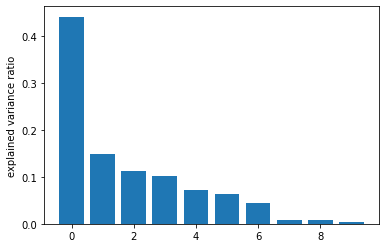

In [50]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
n_components = 10
pca1 = PCA(n_components=10)
train_std_pca_X1 = pca1.fit_transform(train_std_X)
test_std_pca_X1  = pca1.transform(test_std_X)
explained_variance = pca1.explained_variance_ratio_ # explained ratio
plt.bar(np.arange(n_components), explained_variance)
plt.ylabel("explained variance ratio")
plt.show()

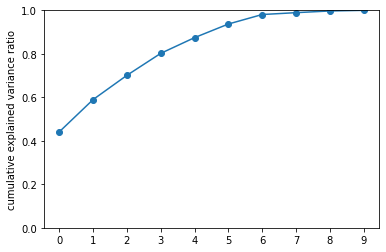

[0.44125146 0.5897829  0.70128934 0.80231275 0.87460042 0.93719745
 0.98087558 0.98940365 0.99720699 1.        ]


In [51]:
fig = plt.figure(figsize=(6,4))
cumulative_explained_variance = np.cumsum(explained_variance)
plt.plot(np.arange(n_components), cumulative_explained_variance, marker="o")
plt.xticks(range(n_components))
plt.ylim(0, 1)
plt.ylabel("cumulative explained variance ratio")
plt.show()
print(cumulative_explained_variance)

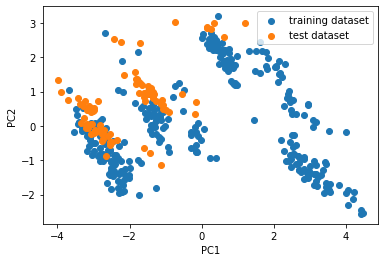

In [52]:
# scatter plot with two principal components
import matplotlib.pyplot as plt
plt.scatter(train_std_pca_X[:,0], train_std_pca_X[:,1], label="training dataset")
plt.scatter(test_std_pca_X[:,0],  test_std_pca_X[:,1],  label="test dataset")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()

<!-- ENG -->
When the training and test data are drawn in the same space, each point of the test data seems to exist close to the training data. In this case, the learned model is more likely to predict the test data appropriately (for more detailed discussion, search for "applicability domain" etc.)

<!-- ENG -->
　However, the mere fact that **training and test data are close together in the projection space of principal component analysis** is not a sufficient condition for successful prediction. This is because these **principal components are not always useful for predicting the target variable**. In this section, we will try to evaluate whether the prediction model works well by drawing the MPG (the target variable) on each point in the training data.

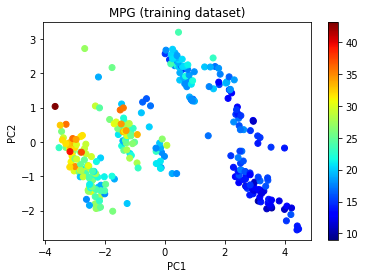

In [53]:
plt.scatter(train_std_pca_X[:,0], train_std_pca_X[:,1], c=train_y, cmap="jet")
plt.colorbar()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("MPG (training dataset)")
plt.show()

<!-- ENG -->
　This figure shows a general trend that the higher the value of PC1, the worse the fuel economy (lower value of MPG), and the higher the value of PC2, the better the fuel economy (higher value of MPG), suggesting that **the objective variable can be predicted from these two principal components**.

<!-- ENG -->
From the above discussion, the following two facts were found.

* The training data and the test data are adjacent to each other in the projective space consisting of the first and second principal components.
* The first and second principal components are useful for MPG estimation. That is, data with similar first and second principal components are estimated to have similar MPG values.

From these two facts, it can be inferred that the model learned from the training data can also predict the test data adequately.

------

<!-- ENG -->
### Final Assignment DS2-1

Fill in the blanks below with the appropriate numbers.

```
Standardization refers to the operation of transforming the values for each feature so that the mean [ ] and variance [ ].
```

------

<!-- ENG -->
### Final Assignment DS2-2

What is the smallest number of dimensions in which the cumulative explained variance ratio exceeds 80% in the PCA?

------

### Final Assignment DS2-3 (Advanced)

In this analysis, it was assumed that the objective variables of the test data `test_X` were known in advance, but this is not always the case in real problems.

Give an example of a case where the objective variables of the data to be predicted **are already known in advance** when building the prediction model, and an example of a case where the objective variables of the data to be predicted **are not yet known** when building the prediction model, respectively.

------

<!-- ENG -->
## DS3 Supervised Learning: Random Forest and Hyperparameter Search

<!-- ENG -->
　Finally, we will perform supervised learning using random forest and evaluate the accuracy we can achieve. In the class, we used `RandomForestClassifier()`, which refers a model for classification, but this time we are dealing with a regression problem. In this case, we will use `RandomForestRegressor()`. First, let's make a prediction once.

In [54]:
# construct regression model
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=10, max_depth=None, random_state=0)

In [55]:
rfr.fit(train_X, train_y)

RandomForestRegressor(n_estimators=10, random_state=0)

In [56]:
predicted = rfr.predict(test_X)

In [57]:
print(predicted)

[31.19 33.44 34.32 33.8  26.79 23.65 24.36 19.82 30.7  27.61 25.78 27.86
 28.34 33.8  26.98 32.81 41.26 41.26 28.69 28.08 34.89 32.85 34.62 19.95
 27.12 26.17 27.24 27.44 26.37 28.81 22.77 28.76 33.38 33.4  33.58 32.85
 33.1  33.77 35.19 34.35 33.51 32.78 31.32 29.34 27.12 25.51 25.6  24.87
 20.28 22.99 21.68 20.79 20.68 20.46 20.85 24.53 24.43 25.64 28.46 27.44
 25.85 26.5  30.75 34.85 34.81 34.51 32.86 28.46 29.34 31.82 34.33 34.79
 34.43 21.16 20.4  28.81 20.05 26.68 28.76 26.18 26.92 37.66 28.76 26.45
 27.17]


<!-- ENG -->
　The prediction results were output. We can see that it is not far off from the MPG values we saw earlier. Here we can evaluate how accurate the prediction is. The main evaluation metrics used are mean squared error (MSE), root MSE (RMSE), and mean absolute error (MAE).

$$ \begin{eqnarray}
 \mathrm{MSE} & = & \frac{\sum_{k=1}^N (y-\hat{y})^2}{N}\\
 \mathrm{RMSE} & = & \sqrt{\mathstrut \mathrm{MSE}} = \sqrt{\frac{\sum_{k=1}^N (y-\hat{y})^2}{N}} \\
 \mathrm{MAE} & = & \frac{\sum_{k=1}^N |y-\hat{y}|}{N}
\end{eqnarray} $$


<!-- ENG -->
As can be seen from the above equation, note that **the MSE outputs the squared value as it is**.

　Apart from these, the correlation coefficient $r$ and the coefficient of determination $r^2$ are also often used. These are not covered in this assignment, but please check them on your own.


In [58]:
# define error functions
import numpy as np
def mse(true_y, pred_y):
  return np.mean( (true_y-pred_y)**2 )
def rmse(true_y, pred_y):
  return np.sqrt(mse(true_y, pred_y))
def mae(true_y, pred_y):
  return np.mean( np.abs(true_y-pred_y) )

In [59]:
mse_val  = mse(test_y, predicted)
rmse_val = rmse(test_y, predicted)
mae_val  = mae(test_y, predicted)

# {var:.3f} displayes up to 3rd decimal place
# .3 means two numbers from decimal point 
# f  means "for floating point variable (real value)"
print(f"mse : {mse_val:.3f}")
print(f"rmse: {rmse_val:.3f}")
print(f"mae : {mae_val:.3f}")

mse : 26.368
rmse: 5.135
mae : 3.989


In [60]:
# MSE and MAE are implemented in scikit-learn
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse_sklearn_val  = mean_squared_error(test_y, predicted)
mae_sklearn_val  = mean_absolute_error(test_y, predicted)

print(f"mse: {mse_sklearn_val:.3f}")
print(f"mae: {mae_sklearn_val:.3f}")


mse: 26.368
mae: 3.989


-------

<!-- ENG -->
### Final Assignment DS3-1

Use the cross-validation method to determine the appropriate hyperparameters for the random forest. By completing the following code, perform the **5-fold cross-validation method** on the training data and report the parameter that **minimizes the MSE**. Here, the hyperparameters to be explored should be as follows. Note that it will takes a minute.

| variables | range of parameters |
| ---- | ---- |
| `n_estimators` | `10, 20, 50, 100, 200, 500` |
| `max_depth` | `1, 2, 3, 4, 5` |

In [75]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rfr = RandomForestRegressor(random_state=0)

from sklearn.model_selection import train_test_split
# ==== Do not change above code ==== 
# ===== write your code below ======
X_train, X_test, y_train, y_test = train_test_split(
    train_X, train_y, test_size=0.2, random_state=0)
#rfr.fit(train_X, train_y)

In [77]:
# Array with one dictionary type in it
param_grid = [  
  {
    "n_estimators": [10, 20, 50, 100, 200, 500],
    "max_depth": [1,2,3,4,5]
  }
]
grid_search_dt = GridSearchCV(rfr, param_grid, cv=5)  # Give an instruction to determine the optimal model by performing 4-fold CV.
grid_search_dt.fit(X_train, y_train)                             # Determine the optimal model by giving the actual data and performing an internal training/validation split
print(grid_search_dt.best_params_)                               # Confirm the optimal hyperparameters
print(grid_search_dt.best_score_)                                # Display the prediction accuracy of the validation set on the optimal hyperparameters.



{'max_depth': 5, 'n_estimators': 50}
0.8456283498236907


In [78]:
predicted = grid_search_dt.predict(test_X)


-----------

<!-- ENG -->
### Final Assignment DS3-2

Using the optimal hyperparameters obtained in DS3-1, build the trained model again using all the training data, and calculate the mean absolute error (MAE) for the test data (not to calculate MSE). **Don't forget to give `random_state=0` to `RandomForestRegressor()` when you run it (it may affect the following tasks)**.

In [85]:
rfr_searched = RandomForestRegressor(n_estimators = 50, criterion = 'absolute_error', max_depth = 5, random_state=0)
rfr_searched.fit(train_X, train_y)
predicted = rfr_searched.predict(test_X)
mae_val  = mae(test_y, predicted)
print(predicted)
print(mae_val)

[30.638 33.195 33.029 32.892 25.392 23.441 23.456 19.845 30.395 25.472
 26.05  25.515 28.488 32.743 24.358 32.864 35.59  35.6   27.044 27.756
 33.706 32.474 32.98  22.613 26.098 25.359 29.052 25.679 25.929 25.226
 23.677 27.489 33.242 32.861 33.535 32.474 32.971 32.559 33.239 33.275
 32.912 32.208 30.441 29.719 28.052 24.843 25.307 25.154 22.62  23.534
 22.495 19.721 20.004 20.528 20.16  23.706 23.991 24.756 26.188 25.679
 24.622 24.99  30.508 32.762 32.887 33.382 32.492 25.548 29.633 31.123
 33.513 33.331 33.239 21.383 19.052 25.226 19.342 25.738 27.489 25.108
 25.052 32.625 27.593 25.115 24.588]
4.533576470588234


-------------

<!-- ENG -->
### Final Assignment DS3-3

Identify the feature importance of the random forest and select the top three features from the following to see which features were important.


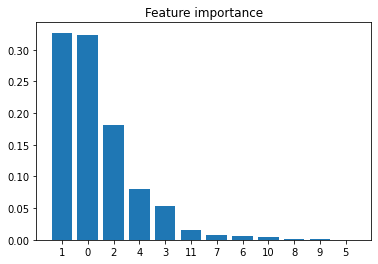

[ 1  0  2  4  3 11  7  6 10  8  9  5]


In [93]:
importances = rfr_searched.feature_importances_

# show importances as barplot
indices = np.argsort(importances)[::-1]
D = 12 # number of importances to show
plt.bar(range(D), importances[indices[:D]])
plt.xticks(range(D), indices[:D])
plt.title("Feature importance")
plt.show()
print(indices)

* Cylinders
* Displacement
* Horse power
* Acceleration
* Model Year
* Origin_1
* Origin_2
* Origin_3
* Weight Category_1
* Weight Category_2
* Weight Category_3
* Weight Category_4

------

<!-- ENG -->
### Final Assignment DS3-4 (Advanced)

Why are those features important? Consider the reasons in the real world (not correlations between variables.)

------

<!-- ENG -->
### Final Assignment DS3-5 (Advanced)
Discuss whether there is a best model selection method other than the cross-validation. If necessary, you may conduct additional experiments and compare your prediction accuracy with that of the test data obtained in DS3-2.

----------

<!-- ENG -->
## AI2 Supervised learning 1: Linear and polynomial regression

<!-- ENG -->
In this final assignment, we will work on three types of regression: linear regression, polynomial regression, and regression using neural networks. In order to properly evaluate and compare these models, we first prepare the validation data. Here, among the training data, we refer to the data of cars whose year of manufacture is 1978-1979 as the validation data, and the rest of the training data, i.e., the data of cars whose year of manufacture is 1970-1977, as the partial training data.

In [62]:
train_sub_X = train_X[train_X["Model Year"] <  78]
train_sub_y = train_y[train_X["Model Year"] <  78]
valid_X     = train_X[train_X["Model Year"] >= 78]
valid_y     = train_y[train_X["Model Year"] >= 78]

<!-- ENG -->
　We will now perform a linear regression, but before that, let us consider whether linear regression is suitable for predicting the objective variable MPG.
Linear regression is a model based on the assumption that there is a linear relationship between each explanatory variable (feature) and the objective variable.

$$
  \hat{y} = \sum_{k=0}^K \hat{w}_kx_k
$$

<!-- ENG -->
This means that if there is a nonlinear relationship between each explanatory variable and the objective variable, **it cannot be represented by a linear regression model, even if there is a obvious relationship between the variables**.

　From the above discussion, by drawing a scatter plot with each explanatory variable and the objective variable as the two axes, and seeing whether or not there is a linear relationship between them, we can use this as a basis for judging whether or not predictions based on linear regression will work. Let's do this.

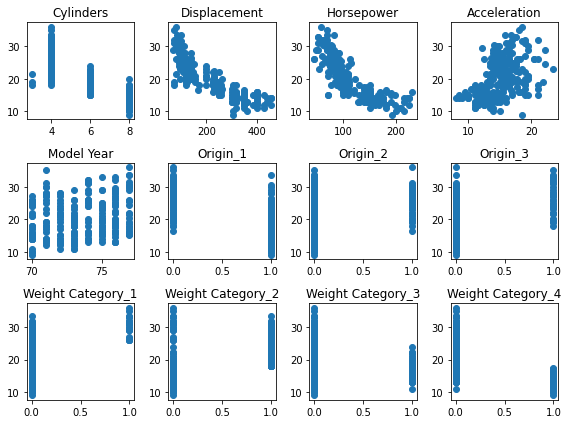

In [63]:
# draw figures: it's quite difficult...
import matplotlib.pyplot as plt
import numpy as np

n_features = len(train_sub_X.columns)
ncols = 4
nrows = np.ceil(n_features/ncols)
fig = plt.figure(figsize=(2*ncols, 2*nrows))

for i, col in enumerate(train_sub_X.columns):
  ax = fig.add_subplot(nrows, ncols, i+1)
  ax.scatter(train_sub_X[col], train_sub_y)
  ax.set_title(col)
  plt.tight_layout()

<!-- ENG -->
It seems that each explanatory variable and the objective variable have a roughly linear relationship, but some explanatory variables seem to have a non-linear relationship. Please keep this in mind as you work on the following final assignment.

------

<!-- ENG -->
### Final Assignment AI2-1

Construct a linear regression model using the partial training data, and calculate the mean absolute error (MAE) for the partial training data and the validation data. MAE can be calculated with `sklearn.metrics.mean_absolute_error()`.

-----

<!-- ENG -->
### Final Assignment AI2-2

Construct a **polynomial regression** model using partial training data **up to the second order term including the interaction term**, and calculate the mean absolute error MAE for the partial training data and the validation data.

------

<!-- ENG -->
### Final Assignment AI2-3

Construct a **polynomial Ridge regression** model using partial training data **up to the second order term including the interaction term**, and calculate the mean absolute error MAE for the partial training data and the validation data. Note that the weight $\alpha$ for the regularization term of Ridge regression should be 0.1.
Do not forget to standardize the features just before performing the Ridge regression by using `make_pipeline`.


-----

<!-- ENG -->
### Final Assignment AI2-4

What was **standardization**, the operation that should have been performed just before the Ridge regression? Fill in the blanks below with the appropriate numbers.

```
Standardization refers to the operation of transforming the values for each feature so that the mean [ ] and variance [ ].
```

----------

<!-- ENG -->
### Final Assignment AI2-5

Based on the results of AI2-2 through AI2-4, which of the following is the "best model"?

- Linear regression model.
- Polynomial Regression model.
- Polynomial Ridge regression model.
- The best cannot be determined.

-------

<!-- ENG -->
### Final Assignment AI2-6 (Advanced)

When the training and validation data are split in advance, as in this case, we cannot simply use `GridSearchCV()`. **For polynomial Ridge regression**, using some method, explore the following hyperparameter space (21 combinations) and report the optimal hyperparameters **which minimizes MAE for validation data**.

| Variables | Range of parameters |
| ---- | ---- |
| number of dimensions `p` | `1, 2, 3` |
| weight of the regularization term `alpha` | `0.001, 0.01, 0.1, 1, 10, 100, 1000` |

-----

<!-- ENG -->
## AI3 Supervised Learning 2: Regression with Neural Networks

<!-- ENG -->
　In the Exercise on Fundamental Artificial Intelligence, we learned neural networks only for classification problems, but it is possible to apply neural networks to regression problems. In this section, we will learn how to apply them to regression problems by doing the final assignment.

<!-- ENG -->
　In the following, we will prepare the data and various functions. The points to be noted when performing regression prediction instead of classification prediction are as follows.

- The features to be input to the neural network should be standardized (or normalized) in advance (This should be also true for classification).
- Both input and output features should be `torch.float`.
- The output should be one-dimensional because we want to predict a single value.
- Set the loss function to `torch.nn.L1Loss`.

In [64]:
# install livelossplot
!pip install livelossplot

In [65]:
# standardization of features
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
train_sub_std_X = ss.fit_transform(train_sub_X)
valid_std_X     = ss.transform(valid_X)

In [66]:
# prepare data
import torch
batch_size = 32

train_X_torch = torch.tensor(train_sub_std_X, dtype=torch.float)
valid_X_torch = torch.tensor(valid_std_X, dtype=torch.float)

# convert a vector to a matrix by reshape
train_Y_torch = torch.tensor(train_sub_y.reshape(-1, 1), dtype=torch.float)
valid_Y_torch = torch.tensor(valid_y.reshape(-1,1), dtype=torch.float)

train_dataset = torch.utils.data.TensorDataset(train_X_torch, train_Y_torch)
valid_dataset = torch.utils.data.TensorDataset(valid_X_torch, valid_Y_torch)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_dataset, batch_size=batch_size, shuffle=True)

In [67]:
def calculate(model, loss_fn, loader, opt=None):
  if opt is None:
    model.eval()

  whole_loss = 0
  count = len(loader.dataset)
  
  for X, y in loader:
    X, y = X.cuda(), y.cuda() # Transfer data to the GPU
    y_pred = model(X) # Predict y from X 
    
    loss = loss_fn(y_pred, y)  # Calculate the average of the losses in a mini-batch
    whole_loss += loss.item()*len(y) # Calculate the total loss for the entire epoch
    
    # Update weights
    if opt is not None:
      opt.zero_grad()
      loss.backward()
      opt.step()
    
  mean_loss = whole_loss / count

  if opt is None:
    model.train()

  return mean_loss

In [68]:
from livelossplot import PlotLosses
def train(model, loss_fn, opt, train_loader, valid_loader, epoch=50):
  liveloss = PlotLosses() # Initialize the drawing
  for i in range(epoch):
    train_loss = calculate(model, loss_fn, train_loader, opt)
    valid_loss = calculate(model, loss_fn, valid_loader)
  
    # Visualize the loss and accuracy values.
    liveloss.update({
        'loss': train_loss,
        'val_loss': valid_loss,
    })
    liveloss.draw()  
  return model # Return the trained model

In [69]:
torch.manual_seed(0) # Ensure reproducibility of learning results
torch.backends.cudnn.deterministic = True # Fix the calculation result on the GPU side

mlp = torch.nn.Sequential(
    torch.nn.Linear(12, 96),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.25),
    torch.nn.Linear(96, 1)
)
mlp.cuda() # Transfer the model to the GPU

# Prepare loss functions and optimization methods
loss_fn = torch.nn.L1Loss()
optimizer = torch.optim.SGD(mlp.parameters(), lr=0.01)

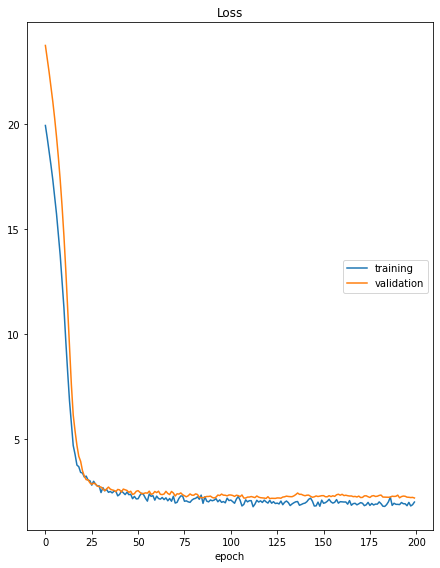

Loss
	training         	 (min:    1.803, max:   19.929, cur:    2.026)
	validation       	 (min:    2.188, max:   23.734, cur:    2.219)


In [70]:
# Run training
trained_model = train(mlp, loss_fn, optimizer, train_loader, valid_loader, epoch=200)

----

<!-- ENG -->
### Final Assignment AI3-1 (Advanced)

In the classification problem, the loss functions were `BCEWithLogitsLoss` and `CrossEntropyLoss`. Discuss why it is necessary to use different loss functions.

----

<!-- ENG -->
### Final Assignment AI3-2
Using the trained model, report the following values.

- MAE (mean absolute error) for partial training data
- MAE for validation data
- MAE for test data

Note that preparation of the test data has not been done, so prepare for prediction and evaluation.

----

<!-- ENG -->
### Final Assignment AI3-3

The convolutional neural network (CNN) cannot be applied to this data (it is unsuitable to use). Briefly answer the reason.

----

<!-- ENG -->
## DS4 / AI4 Application to your own task


<!-- ENG -->
### Final Assignment DS4-1 / AI4-1 (Advanced)
On the dataset you prepared, apply what you learned in this exercise and other machine learning methods to train and predict. When submitting, create a new ipynb file, and if possible, submit a csv file of the dataset as well.

This assignment is optional even for students of Exercises in fundamentals of **progressive** data science and/or Exercises in fundamentals of **progressive** artificial intelligence.

-----

<!-- ENG -->

# Report submissions (FY2021)



<!-- ENG -->
## How to submit reports

　The report should be submitted **via T2SCHOLA**. **The deadline is 9 p.m., 2nd Dec.** Be sure to submit your work with plenty of time to spare as the form cannot receive after the deadline.
